### import packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### get file path and read data

In [2]:
current_directory = os. getcwd() 
file_path = current_directory + '/order_data.csv'
df = pd.read_csv(file_path)
df = df[['order id', 'paid time']]
df = df[~(df['paid time'] < '2015-01-01')]  # there are 3 test records whose paid time is before company foundation day
df = df[df['paid time'].notna()]   # there are 3 records whose paid time column is NaN

### datetime manipulation
The Zulu time zone (Z) is the same zone as the Greenwich or Prime Meridian with no offset written as UTC +0:00.

In [3]:
df['paid time'] = pd.to_datetime(df['paid time'], utc=True)  #convert zulu time to UTC+0
df['paid time'] = df['paid time'].apply(lambda x: x.tz_convert('Asia/Taipei')) # convert time zone to local timezone

### order counts

#### by year and month (6-year overall)

In [4]:
df_year_month = df.groupby([df['paid time'].dt.month, df['paid time'].dt.year]).agg({'count'})
df_year_month = df_year_month[('paid time', 'count')].unstack()
df_year_month = df_year_month.fillna(0).astype('int')

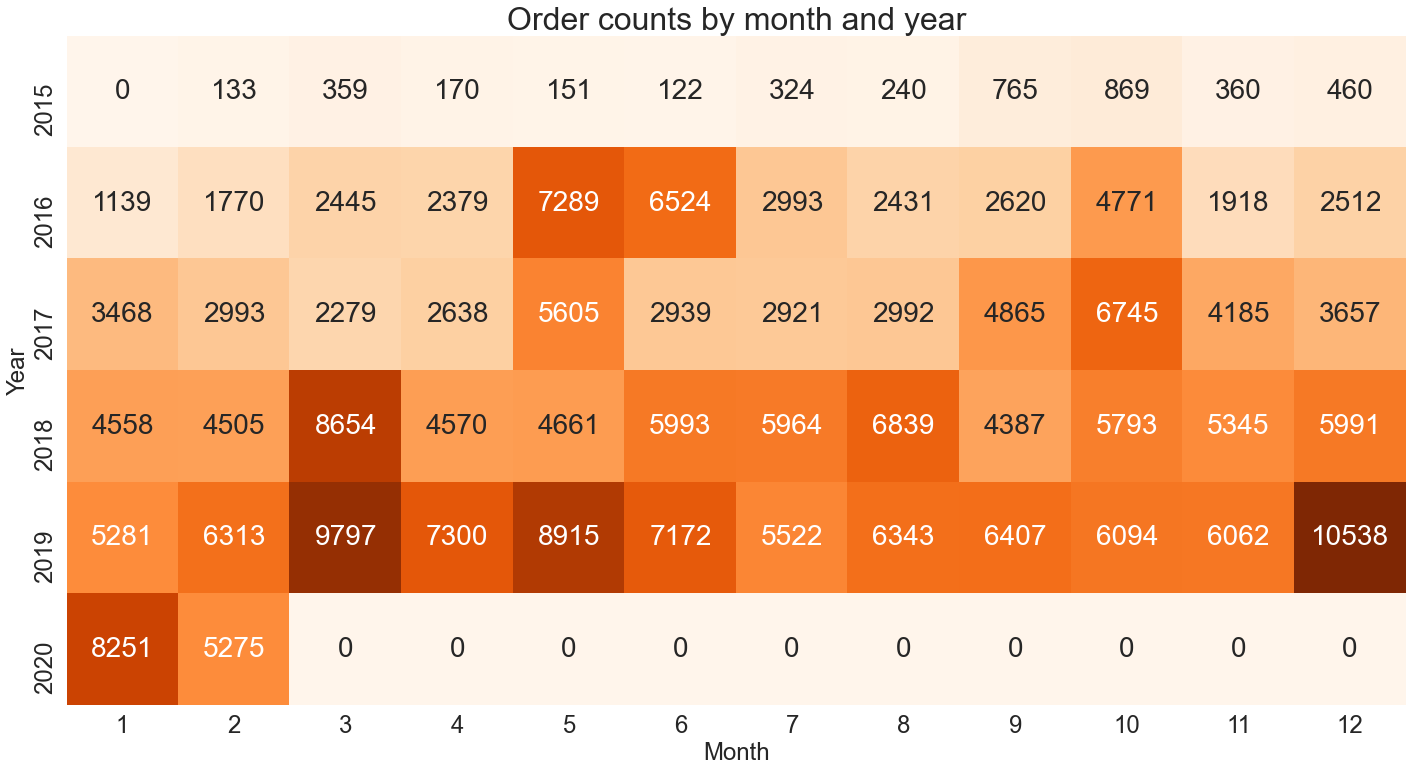

In [5]:
fig1, ax = plt.subplots(figsize = (24,16))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax = sns.heatmap(df_year_month.T, annot=True, fmt='d', cbar = False, cmap = 'Oranges', square = True, annot_kws={'size': 28})
ax.axes.set_title('Order counts by month and year', fontsize=32)
ax.set_xlabel('Month', fontsize = 24)
ax.set_ylabel('Year', fontsize = 24);

#### by day of week and hour of day (6-year overall)

In [6]:
df_week_hour = df.groupby([df['paid time'].dt.weekday, df['paid time'].dt.hour]).agg({'count'})
df_week_hour = df_week_hour[('paid time', 'count')].unstack()

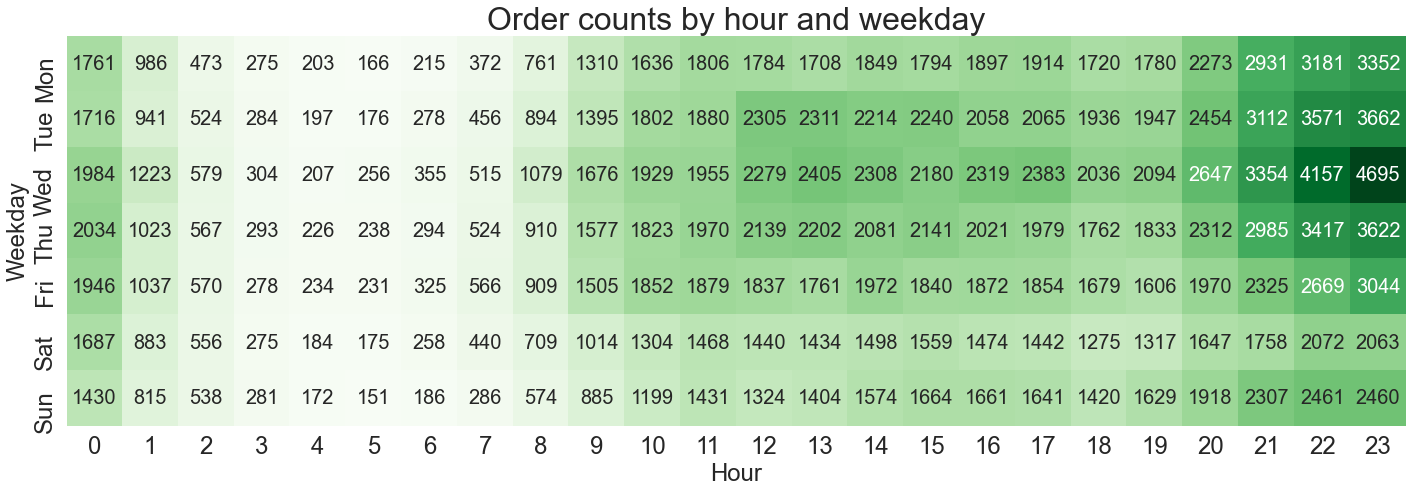

In [7]:
fig2, ax = plt.subplots(figsize=(24,16))
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax = sns.heatmap(df_week_hour, annot=True, fmt='d', cbar = False, cmap = 'Greens', square = True, annot_kws={'size': 20})
ax.axes.set_title('Order counts by hour and weekday', fontsize=32)
ax.set_xlabel('Hour', fontsize = 24)
ax.set_ylabel('Weekday', fontsize = 24)
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

#### by day of week and hour of day (2015 to 2020)

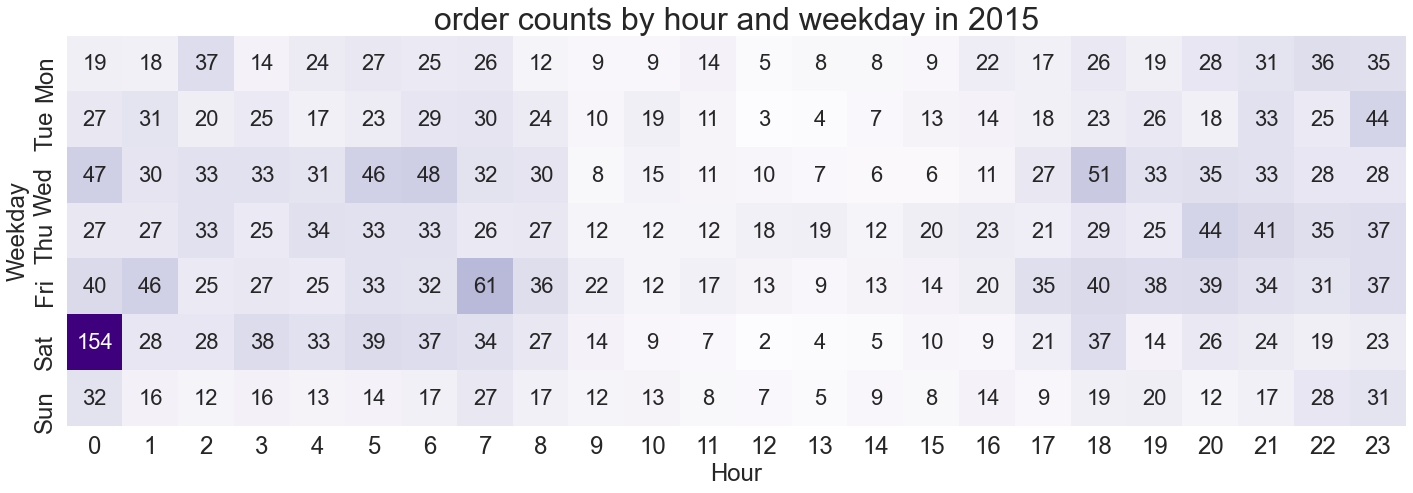

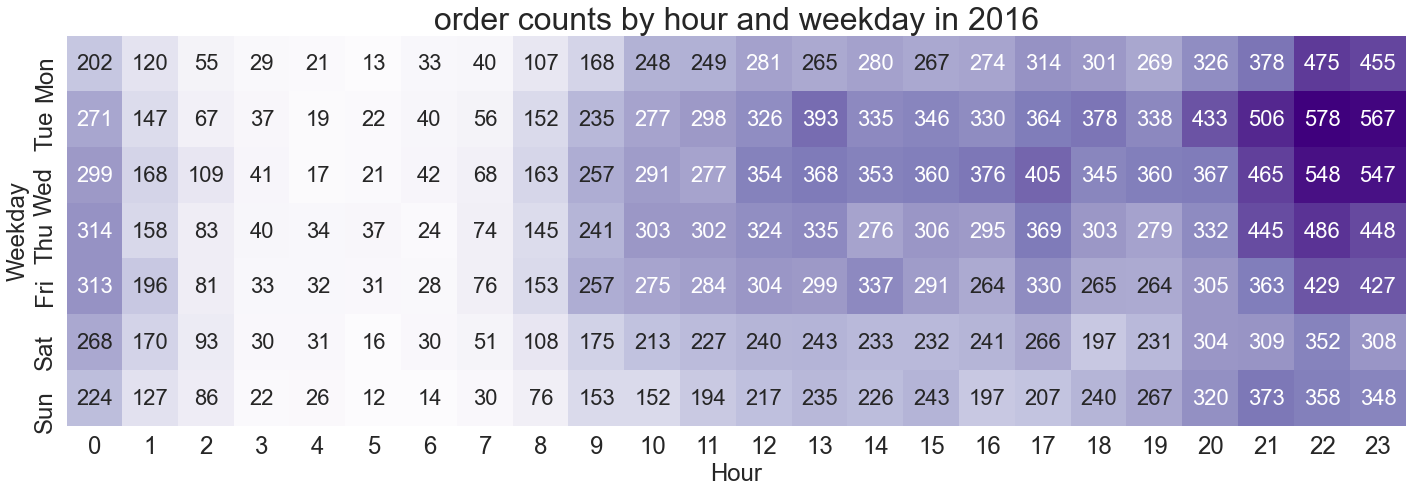

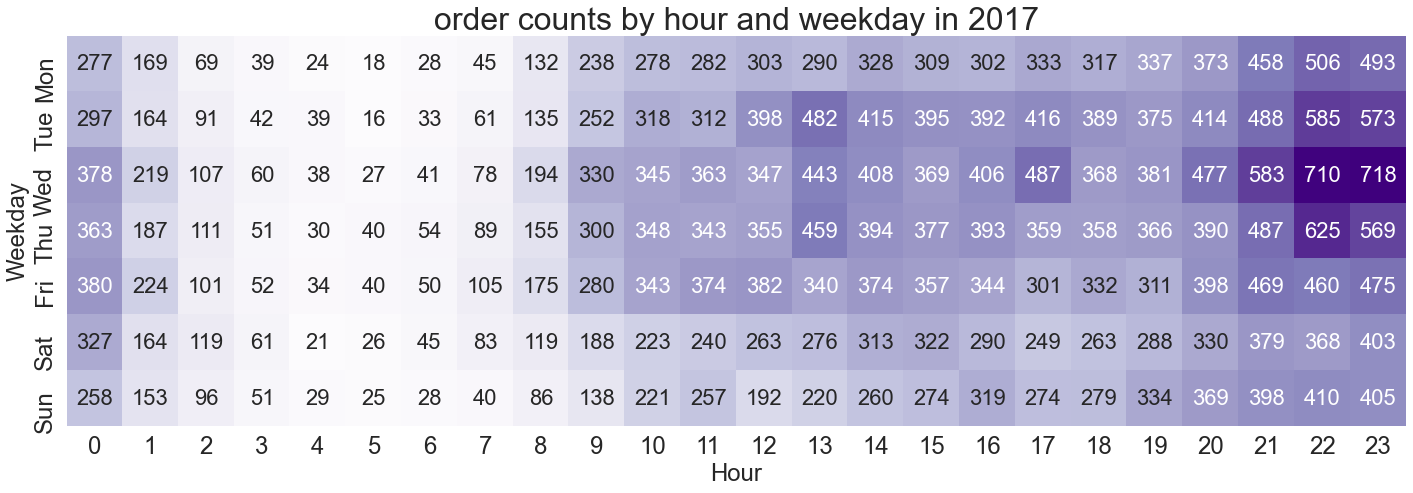

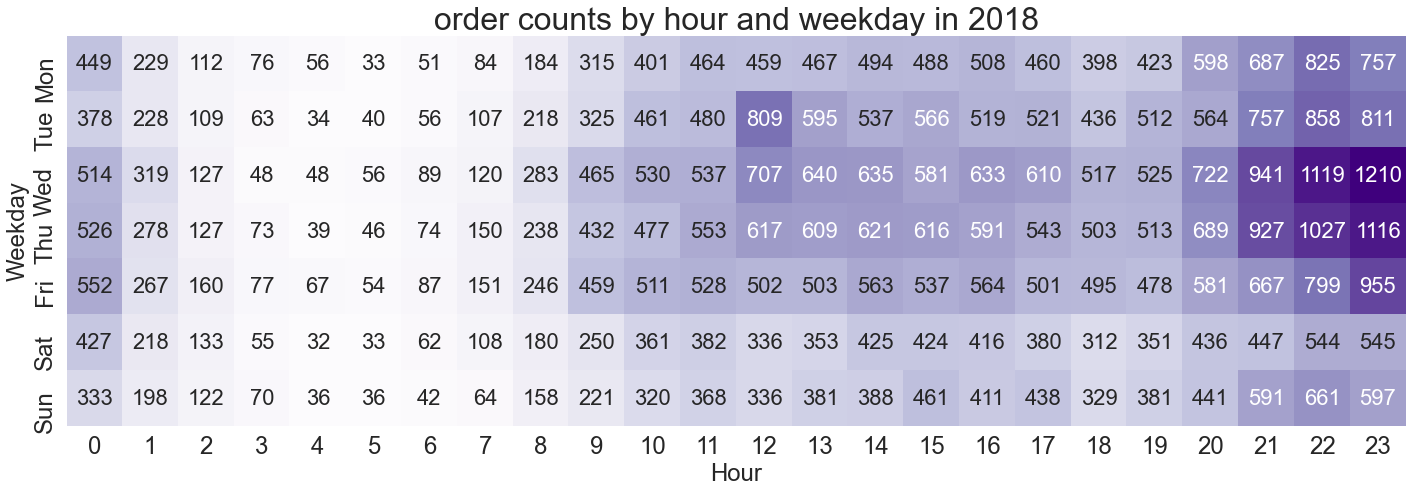

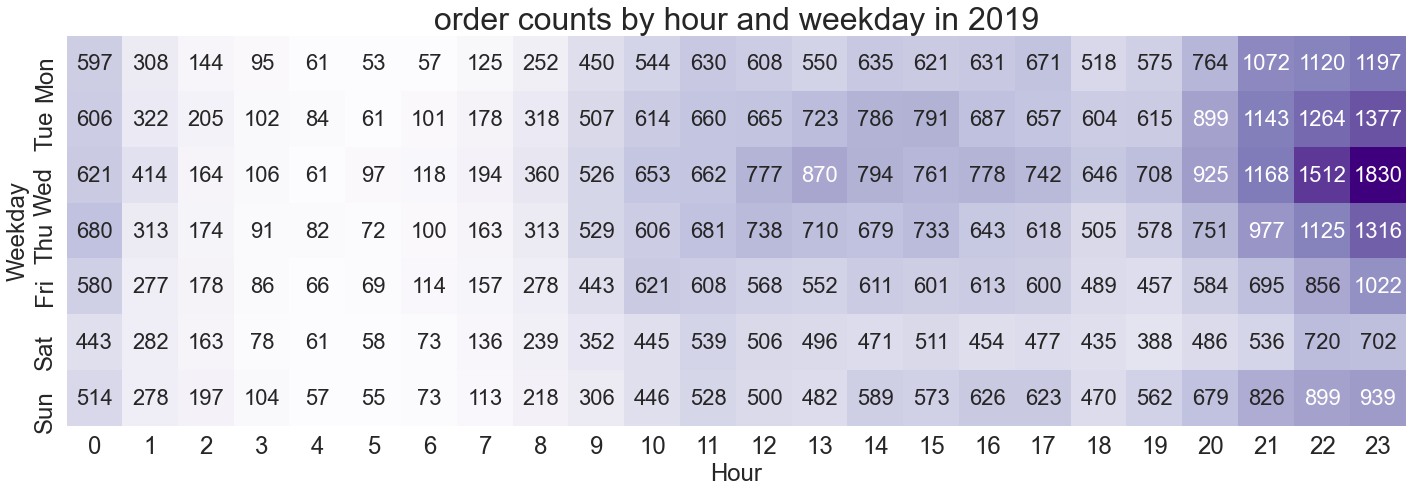

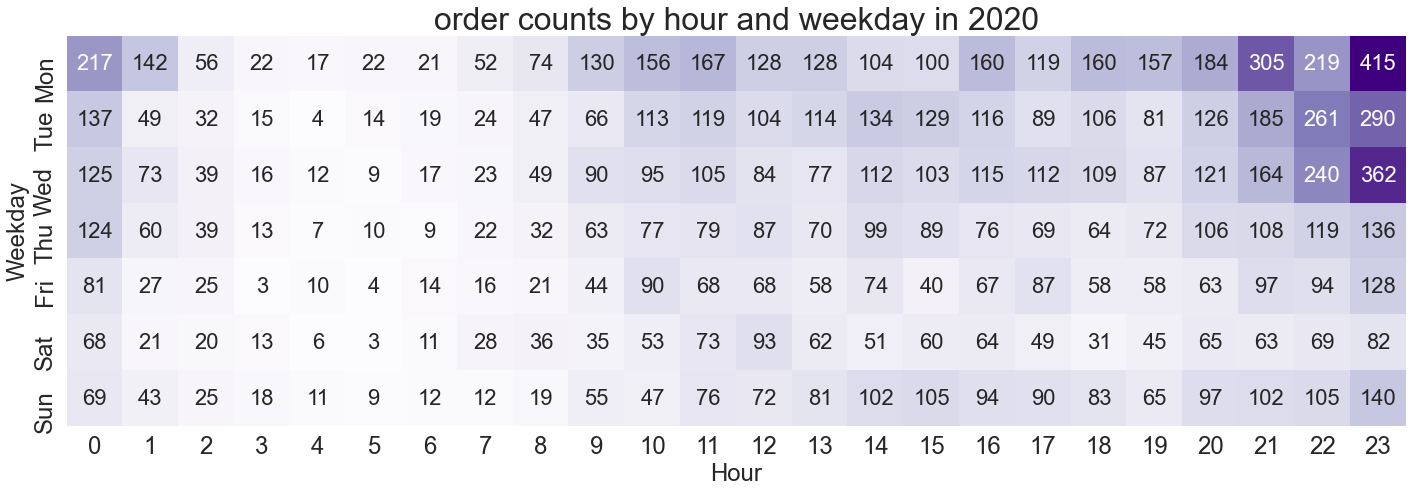

In [8]:
for year in range(2015, 2021):
    df_week_hour_each_year = df[df['paid time'].dt.year == year]
    df_week_hour_each_year = df_week_hour_each_year.groupby([df_week_hour_each_year['paid time'].dt.weekday, df_week_hour_each_year['paid time'].dt.hour]).agg({'count'})
    df_week_hour_each_year = df_week_hour_each_year[('paid time', 'count')].unstack()
    
    fig, ax = plt.subplots(figsize=(24,16))
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    ax = sns.heatmap(df_week_hour_each_year, annot=True, fmt='d', cbar = False, cmap = 'Purples', square = True, annot_kws={'size': 22})
    ax.axes.set_title('order counts by hour and weekday' + ' in ' + str(year), fontsize=32)
    ax.set_xlabel('Hour', fontsize = 24)
    ax.set_ylabel('Weekday', fontsize = 24)
    ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])